# Dilation, Erosion and Edge Detection

- dilation
- erosion
- opening
- closing
- canny edge detection

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [26]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/Lions/01dddc577890595e.jpg'

---
### Loading data

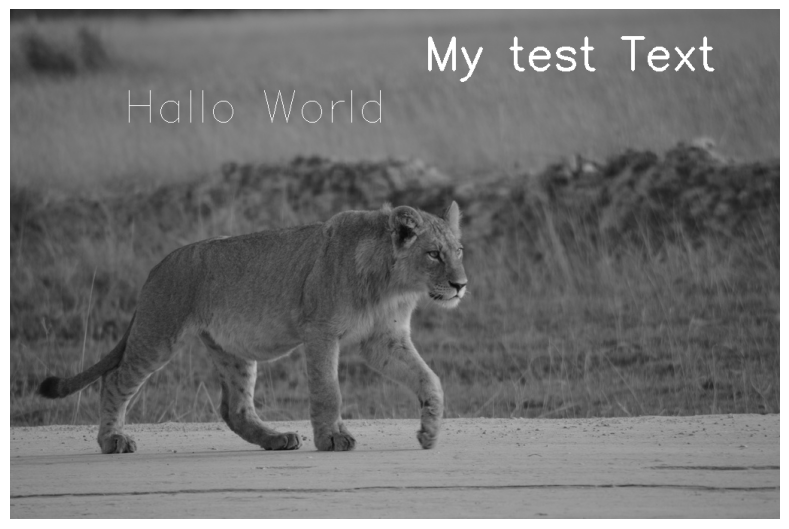

In [44]:
img = cv2.imread(IMG_PATH, 0)
cv2.putText(img, "My test Text", (550, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 3)
cv2.putText(img, "Hallo World", (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 1)
imshow(img, size=15)

---
### Dilation, Erosion, Opening and Closing

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

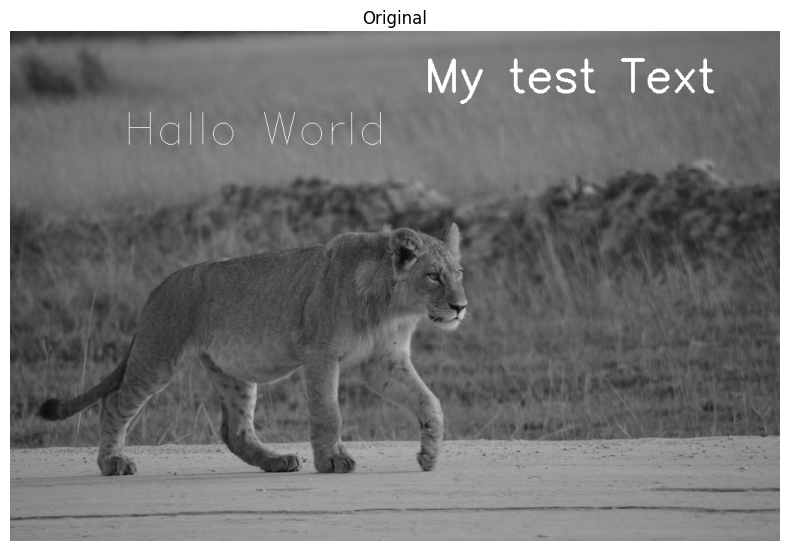

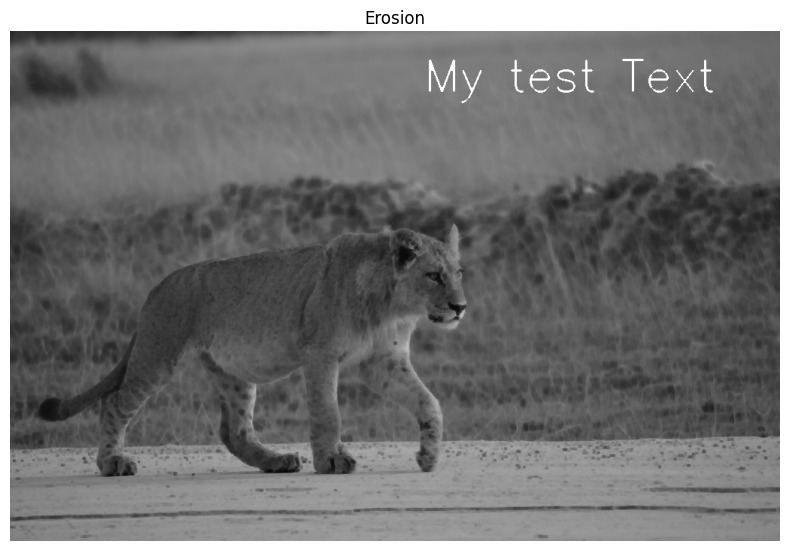

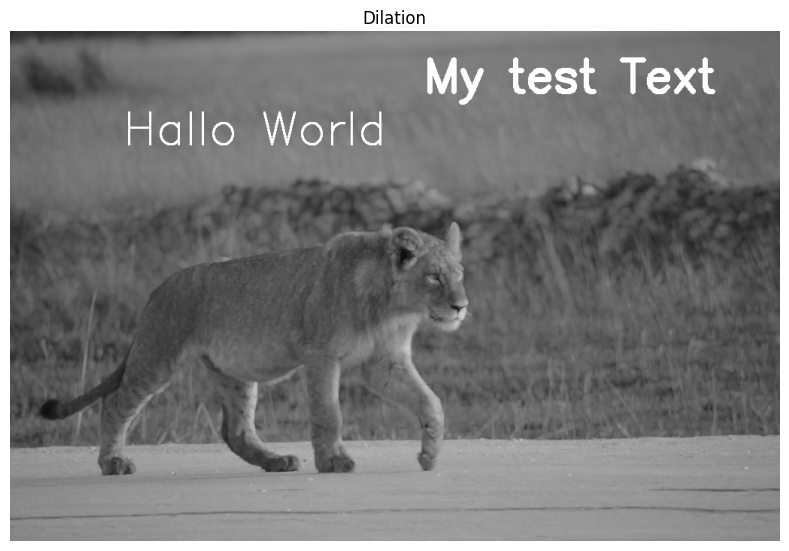

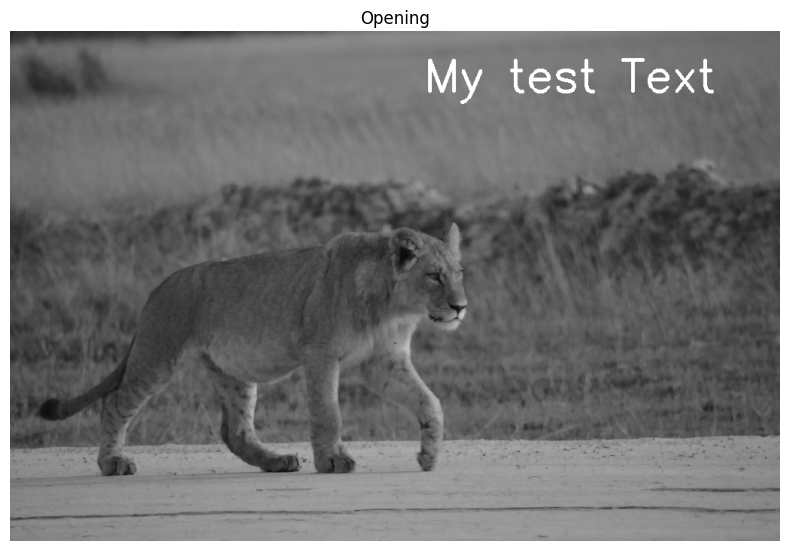

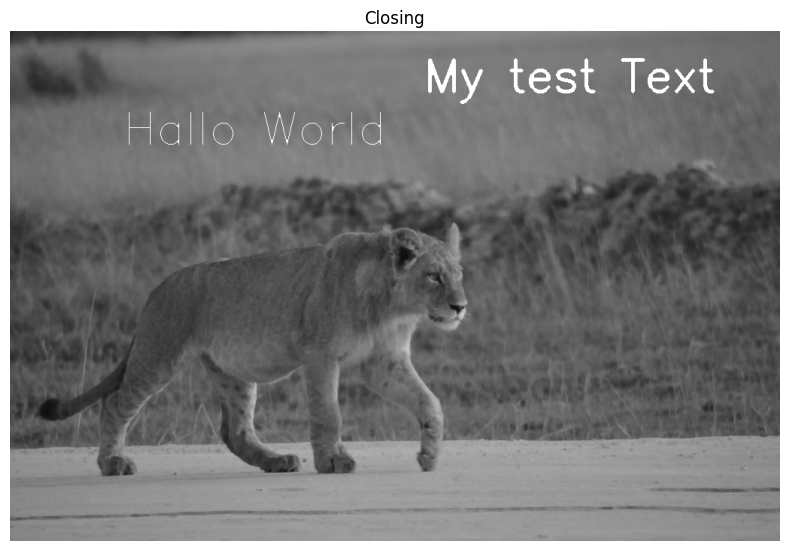

In [47]:
imshow(img, "Original", size=15)

kernel = np.ones((3, 3), np.uint8)

erosion = cv2.erode(img, kernel, iterations=1)
imshow(erosion, "Erosion", size=15)

dilation = cv2.dilate(img, kernel, iterations=1)
imshow(dilation, "Dilation", size=15)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
imshow(opening, "Opening", size=15)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
imshow(closing, "Closing", size=15)

---
### Canny Edge Detection

Looks at the change of the intensity (bright/dark) and decide with that, if there is an edge.

```python
cv2.Canny(img, min value, max value[, aperture size -> used Sobel Kernel])
```

These min and max values are the the values of the change of the intensity/the edges. Bright-to-dark-edge and Dark-to-bright-edge.

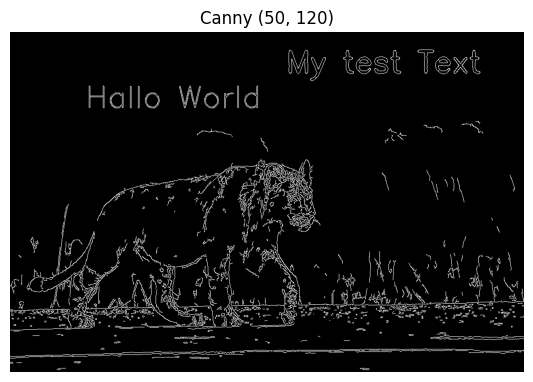

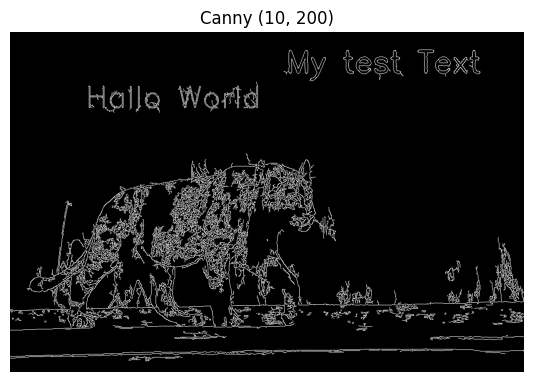

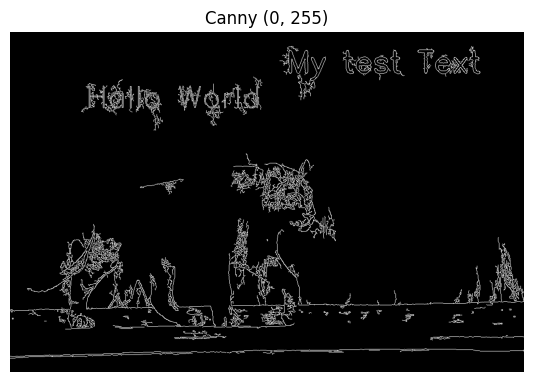

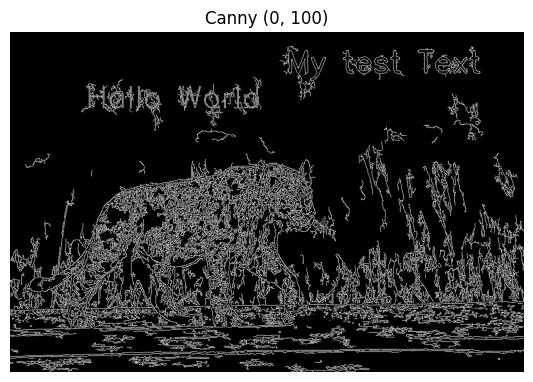

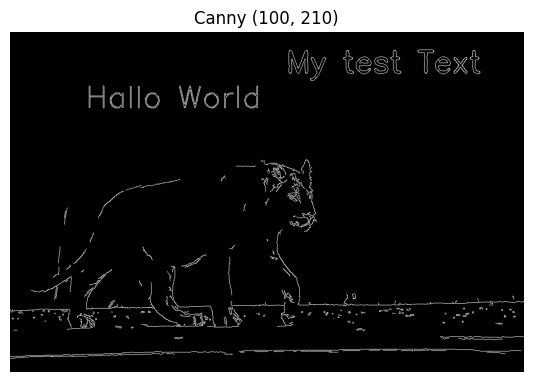

In [59]:
canny_img = cv2.Canny(img, 50, 120)
imshow(canny_img, "Canny (50, 120)")

canny_img = cv2.Canny(img, 10, 200)
imshow(canny_img, "Canny (10, 200)")

canny_img = cv2.Canny(img, 0, 255)
imshow(canny_img, "Canny (0, 255)")

canny_img = cv2.Canny(img, 0, 100)
imshow(canny_img, "Canny (0, 100)")

canny_img = cv2.Canny(img, 100, 210)
imshow(canny_img, "Canny (100, 210)")

**auto canny**

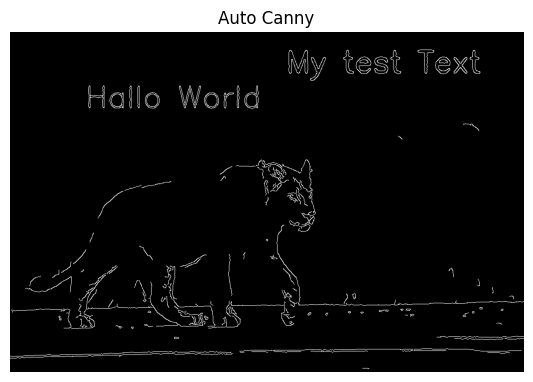

In [69]:
def auto_canny(img:np.array, sigma=0.33):
    img = cv2.blur(img, ksize=(3, 3))
    median = np.median(img)
    lower = int(max(0, (1.0-sigma)*median))
    upper = int(min(255, (1.0+sigma)*median))
    return cv2.Canny(image=img, threshold1=lower, threshold2=upper)

imshow(auto_canny(img), "Auto Canny")

---